## Training CIFAR10 using CNN

### Importing Libraries

In [1]:
!pip install matplotlib
from tensorflow.keras import Sequential, datasets
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import numpy as np
from matplotlib import pyplot as plt
import os

Defaulting to user installation because normal site-packages is not writeable


### Loading the dataset

In [2]:
(X_Train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 682s 4us/step


In [4]:
X_Train.shape

(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
y_train = y_train.reshape(-1, ) #reshaping labels
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [12]:
#naming the classes present in the dataset
y_classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

### Loading Images

In [10]:
def showImage(x, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(y_classes[y[index]])

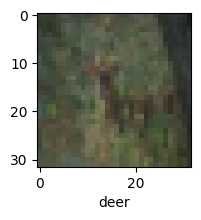

In [11]:
showImage(X_Train, y_train, 10)

### Normalizing Data

In [13]:
X_Train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [14]:
X_Train = X_Train/255
X_test = X_test/255
X_Train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

### Building the Model

In [16]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(4,4), activation="relu"))

model.add(Flatten())
model.add(Dense(units=34, activation="relu"))
model.add(Dense(units=10, activation="softmax"))

C:\Users\Ananya\Desktop\cif10\cif10\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

### Training

In [23]:
model.fit(X_Train, y_train, validation_data=(X_test, y_test), epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8208 - loss: 0.5048 - val_accuracy: 0.6643 - val_loss: 1.0620
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8369 - loss: 0.4658 - val_accuracy: 0.6770 - val_loss: 1.1085
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8439 - loss: 0.4413 - val_accuracy: 0.6693 - val_loss: 1.1760
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8527 - loss: 0.4187 - val_accuracy: 0.6604 - val_loss: 1.2250
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8677 - loss: 0.3800 - val_accuracy: 0.6676 - val_loss: 1.2702


### Predictions

In [24]:
y_predictions = model.predict(X_test)
y_predictions[9]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([2.1649136e-03, 6.8760580e-01, 4.9655449e-07, 2.2373033e-05,
       1.5381735e-05, 4.4933017e-06, 2.2884119e-07, 1.8871137e-06,
       2.6179487e-03, 3.0756646e-01], dtype=float32)

In [27]:
y_predictions = [np.argmax(arr) for arr in y_predictions]

In [28]:
y_predictions

[3,
 8,
 8,
 0,
 4,
 6,
 1,
 6,
 3,
 1,
 0,
 9,
 2,
 7,
 9,
 6,
 3,
 5,
 8,
 6,
 7,
 2,
 4,
 9,
 4,
 2,
 2,
 0,
 9,
 6,
 6,
 4,
 4,
 3,
 9,
 9,
 4,
 9,
 9,
 5,
 4,
 6,
 3,
 6,
 0,
 9,
 3,
 5,
 7,
 6,
 9,
 8,
 6,
 5,
 8,
 8,
 7,
 3,
 5,
 2,
 7,
 5,
 3,
 3,
 6,
 2,
 1,
 2,
 5,
 7,
 2,
 6,
 8,
 8,
 0,
 2,
 7,
 3,
 3,
 8,
 8,
 1,
 1,
 7,
 0,
 7,
 7,
 0,
 9,
 9,
 0,
 6,
 8,
 6,
 4,
 6,
 6,
 2,
 2,
 7,
 4,
 4,
 6,
 6,
 1,
 1,
 3,
 6,
 8,
 5,
 4,
 0,
 2,
 2,
 1,
 3,
 0,
 0,
 6,
 5,
 8,
 2,
 1,
 5,
 8,
 6,
 0,
 3,
 3,
 0,
 4,
 1,
 9,
 9,
 1,
 2,
 7,
 7,
 2,
 8,
 3,
 5,
 6,
 6,
 8,
 3,
 6,
 5,
 2,
 3,
 8,
 9,
 6,
 0,
 0,
 3,
 2,
 9,
 3,
 4,
 3,
 1,
 5,
 6,
 0,
 4,
 8,
 6,
 9,
 4,
 9,
 9,
 9,
 8,
 9,
 9,
 3,
 7,
 3,
 0,
 8,
 5,
 2,
 2,
 3,
 8,
 6,
 3,
 7,
 8,
 5,
 3,
 2,
 1,
 7,
 2,
 5,
 8,
 3,
 3,
 3,
 0,
 8,
 7,
 1,
 3,
 0,
 5,
 7,
 9,
 5,
 0,
 3,
 9,
 0,
 3,
 0,
 9,
 8,
 7,
 5,
 3,
 9,
 3,
 5,
 1,
 3,
 2,
 3,
 6,
 5,
 1,
 3,
 8,
 8,
 0,
 4,
 7,
 8,
 6,
 1,
 1,
 8,
 9,
 0,
 6,
 1,
 8,
 2,
 1,


In [29]:
y_test = y_test.reshape(-1, )

In [34]:
y_predictions[3]

0

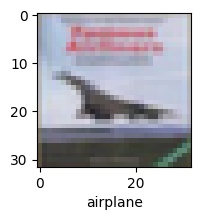

In [35]:
showImage(X_test, y_test, 3)